In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.regularizers import L2
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

In [4]:
# Pre Processing

data = pd.read_csv('./dataset/churn.csv') # Read from CSV File

data = data.drop(columns=['customer_id', 'country', 'gender']) # Drop unuseds columns

X = data.drop(columns=['churn'])
y = data['churn']

# Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting Dataset to Temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=22)

# Splitting Dataset to Test & Validation
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=32)


In [9]:
# Modelling

# model = Sequential([
#   Dense(units=1, activation='sigmoid')
# ])

model = Sequential([
  Dense(units=128, activation='relu'),
  Dropout(0.5),
  Dense(units=64, activation='relu'),
  Dropout(0.5),
  Dense(units=32, activation='relu'),
  Dense(units=1, activation='sigmoid', kernel_regularizer=L2(0.005))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))
print(history.history)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7948 - val_loss: 0.4493 - val_accuracy: 0.8186
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8010 - val_loss: 0.4151 - val_accuracy: 0.8388
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8123 - val_loss: 0.4018 - val_accuracy: 0.8478
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8240 - val_loss: 0.3858 - val_accuracy: 0.8560
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8282 - val_loss: 0.3761 - val_accuracy: 0.8568
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8407 - val_loss: 0.3698 - val_accuracy: 0.8586
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8408 - val_loss: 0.3622 - val_accuracy: 0.8588

In [6]:
# Make Predictions
y_pred = model.predict(X_test)

# Thresholds
y_pred_label = [1 if p >= 0.5 else 0 for p in y_pred]
print(f'Predictions Labels : {y_pred_label}')
print(f'Predictions: {y_pred}')

157/157 [==============================] - 0s 778us/step
Predictions Labels : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
# Evaluate the models
print(np.array(y_test))
y_pred = (y_pred > 0.5)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on Testing Set : {accuracy}')

print(f'Accuracy with sklearn : {accuracy_score(np.array(y_test), y_pred)}')

[0 1 0 ... 0 0 0]
157/157 [==============================] - 0s 661us/step - loss: 0.4552 - accuracy: 0.9006
Accuracy on Testing Set : 0.900600016117096
Accuracy with sklearn : 0.9006


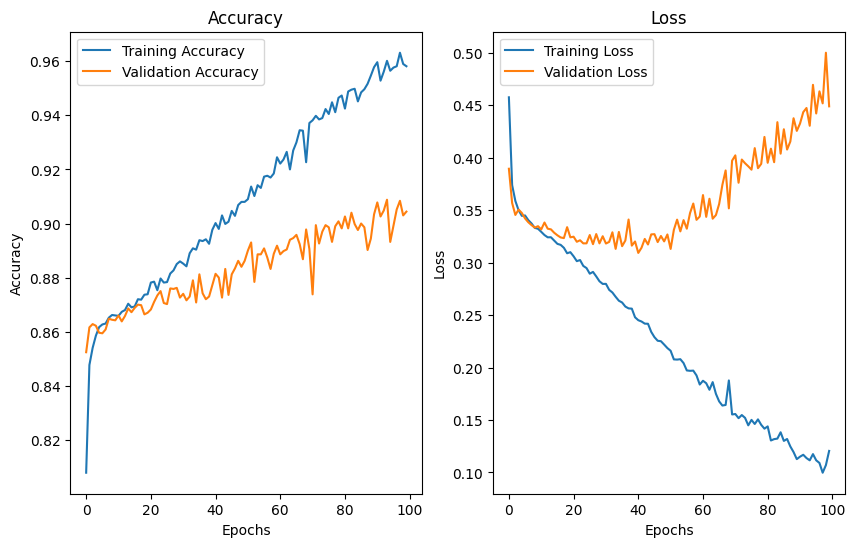

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()